In [1]:
from numpy import *
import operator
import matplotlib.pyplot as plt

In [2]:
def createDataSet():
    group = array([[1.0,1.1], [1.0,1.0], [0,0], [0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

In [3]:
def classify0(X, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    #calculate euclidean distance
    diffMat = tile(X, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)
    distances = sqDistances**0.5

    #sorting and getting indices
    sortedDistIndices = distances.argsort()

    classCount = {}
    for i in range(k):
        votelabel = labels[sortedDistIndices[i]]
        classCount[votelabel] = classCount.get(votelabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)  #sort by values
    return sortedClassCount[0][0]

In [4]:
def plotDataSet(group, labels, predict_points=None):
    for i in range(len(labels)):
        if labels[i] == 'A':
            plt.scatter(group[i][0], group[i][1], color='blue', label='A' if 'A' not in labels[:i] else "")
        else:
            plt.scatter(group[i][0], group[i][1], color='red', label='B' if 'B' not in labels[:i] else "")

    # Plot the point to be predicted, if provided
    if predict_points is not None:
        for idx, point in enumerate(predict_points):
            plt.scatter(point[0], point[1], color='green', marker='x', s=100)
            plt.text(point[0] + 0.02, point[1] + 0.02, str(idx), fontsize=9, color='green')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('2D Visualization of Dataset')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
group, labels = createDataSet()

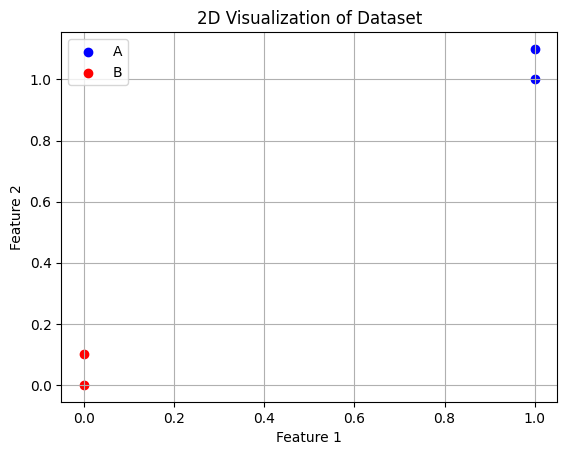

In [6]:
plotDataSet(group, labels)

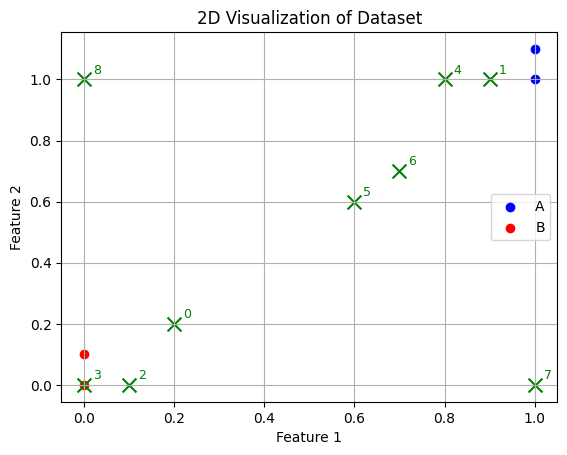

point0-> [0.2, 0.2]:  B
point1-> [0.9, 1.0]:  A
point2-> [0.1, 0.0]:  B
point3-> [0, 0]:  B
point4-> [0.8, 1]:  A
point5-> [0.6, 0.6]:  A
point6-> [0.7, 0.7]:  A
point7-> [1.0, 0.0]:  B
point8-> [0.0, 1.0]:  B


In [7]:
new_points = [[0.2, 0.2], [0.9, 1.0], [0.1, 0.0], [0,0], [0.8,1], [0.6, 0.6], [0.7,0.7], [1.0,0.0], [0.0,1.0]]
plotDataSet(group, labels, predict_points=new_points)
for i in range(len(new_points)):
    print(f"point{i}-> {new_points[i]}:  {classify0(new_points[i], group, labels, 3)}")